<a href="https://colab.research.google.com/github/KavyaOS/Neural_Networks/blob/main/NN_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Create train test split
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #90% training, 10% to test
x_train[0].shape

(28, 28)

In [4]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

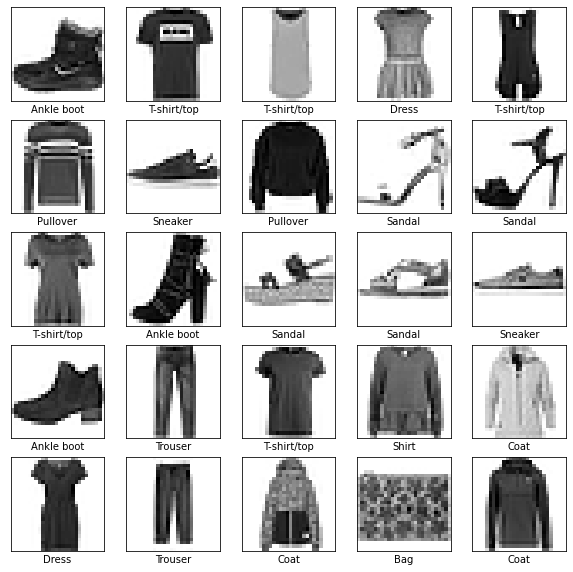

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
# Create model structure
model = keras.Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10)) #No of different outputs to predict

In [11]:
# create model compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
# train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6396 - accuracy: 0.7815
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3912 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8993
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9018
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2501 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.244

In [13]:
# Test model accuracy with test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3402 - accuracy: 0.8828

Test accuracy: 0.8827999830245972


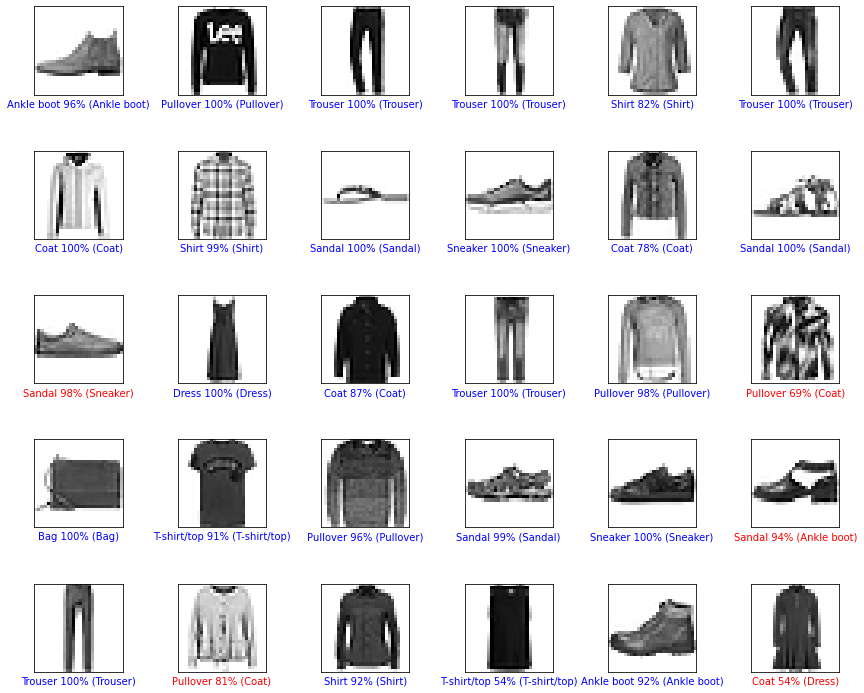

In [14]:
#@title Check Model Accuracy

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols,i+1)
  plot_image(i, predictions[i], y_test, x_test)

plt.tight_layout()
plt.show()